In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
pd.options.display.max_columns = 150

train = pd.read_csv("/content/drive/MyDrive/train.csv")
test = pd.read_csv("/content/drive/MyDrive/test.csv")
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [6]:
train.info()
# sample : 9557, columns :143
# dtype : float64(8), int64(130), object(5)
# object var는 머신 러닝에 이용할 수 없다 -> 변환해줘야함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


Text(0.5, 1.0, 'Count of Unique Values')

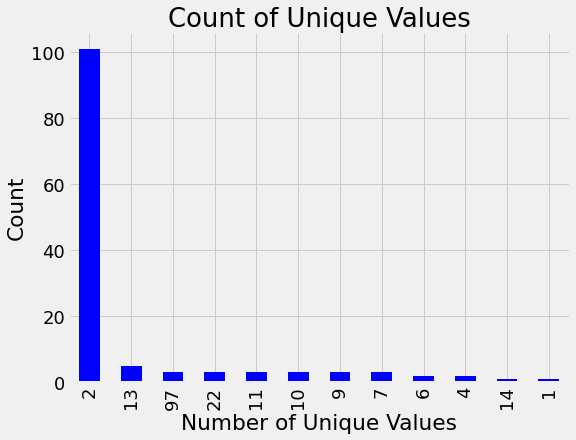

In [7]:
train.select_dtypes(np.int64).nunique().value_counts().plot.bar(color = 'blue', figsize=(8,6))
plt.xlabel('Number of Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values')
#int 형에서의 unique 값을 알아봄
#Boolean이 많은 case를 차지하고 있는 것을 알 수 있음

In [8]:
train.select_dtypes('float').dropna()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0000,121.00
6,180000.0,1.0,0.0,11.0,1.333333,1.777778,1.0000,121.00
75,350000.0,3.0,0.0,16.5,1.000000,1.000000,0.2500,272.25
130,260000.0,3.0,0.0,9.5,2.000000,4.000000,1.0000,90.25
133,260000.0,3.0,0.0,9.5,2.000000,4.000000,1.0000,90.25
...,...,...,...,...,...,...,...,...
8991,100000.0,1.0,0.0,19.0,1.250000,1.562500,2.2500,361.00
9037,150000.0,1.0,0.0,14.0,1.000000,1.000000,1.0000,196.00
9039,150000.0,1.0,0.0,14.0,1.000000,1.000000,1.0000,196.00
9066,40000.0,1.0,0.0,11.0,1.333333,1.777778,1.0000,121.00


In [9]:
train['v18q1'].unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.])

In [10]:
train.select_dtypes('object').head()
# dependencty : 부양률
# edjefe : 교육연도(남성 가구주)
# edjefa : 교육연도(여성 가구주)

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [11]:
mapping = {'yes' : 1, 'no' : 0}
for df in [train, test]:
  df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
  df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)
  df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


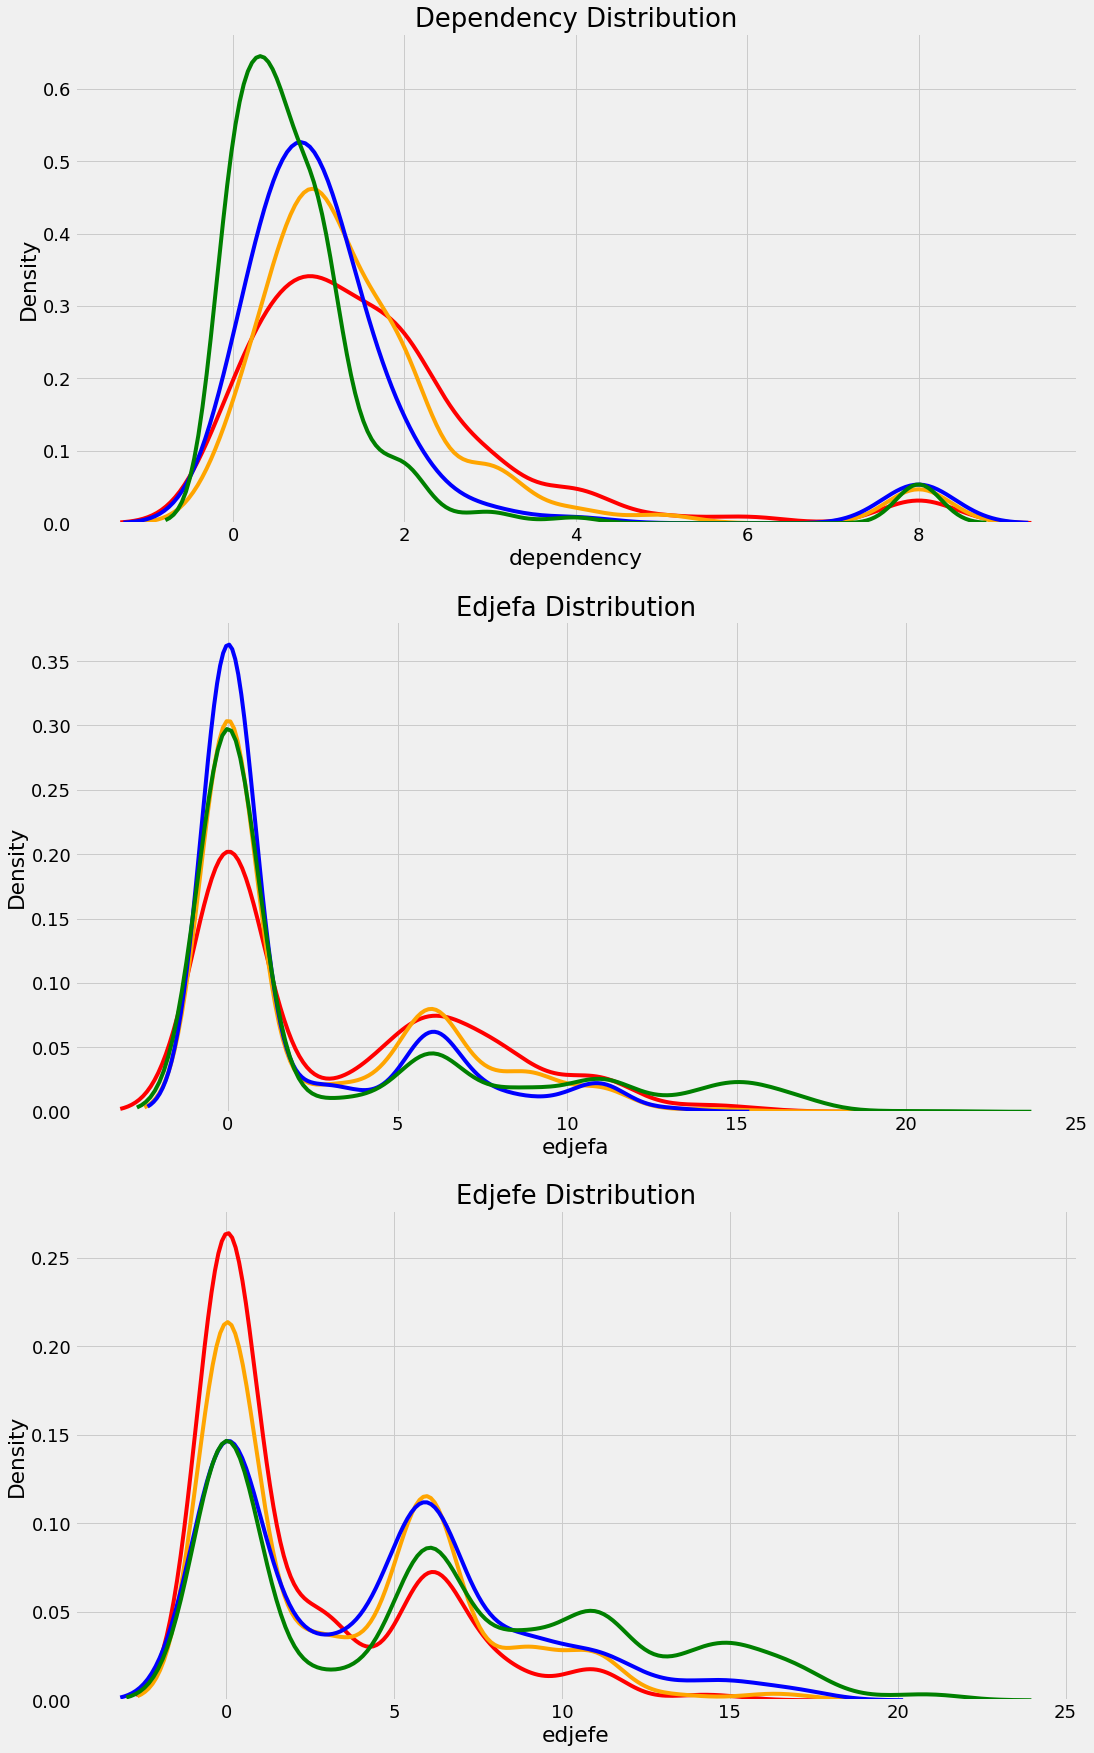

In [12]:
# kdeplot
plt.figure(figsize=(16,12))
colors = {1: 'red',2 : 'orange', 3: 'blue', 4 : 'green'}
poverty_mapping = {1 : 'extreme', 2 :'moderate', 3 :'vulnerable', 4 : 'non vulnerable'}

for i, col in enumerate(['dependency','edjefa','edjefe']):
  ax = plt.subplot(3, 1, i+1)
  for poverty_level, color in colors.items():
    sns.kdeplot(train.loc[train['Target']== poverty_level, col].dropna(),
                ax = ax, color = color, label = poverty_mapping[poverty_level])
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}');plt.ylabel('Density')

plt.subplots_adjust(top = 2)

In [13]:
test['Target'] = np.nan
data = pd.concat([train, test], axis = 0, ignore_index = True)
data.shape

(33413, 143)

In [14]:
poverty_mapping.keys()

dict_keys([1, 2, 3, 4])

Text(0.5, 1.0, 'Poverty Level')

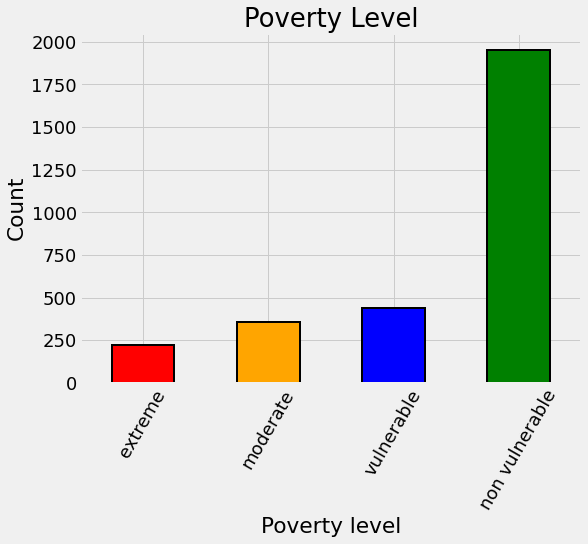

In [15]:
#heads of household
heads = data.loc[data['parentesco1']==1].copy()
train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1']==1), ['Target', 'idhogar']]

label_counts = train_labels['Target'].value_counts().sort_values()
label_counts.plot.bar(figsize=(8,6), color=colors.values(), edgecolor='k', linewidth = 2)
plt.xlabel('Poverty level')
plt.ylabel('Count')
plt.xticks([x-1 for x in poverty_mapping.keys()], list(poverty_mapping.values()), rotation = 60)
plt.title('Poverty Level')
# 불균형한 label

In [16]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0.0,10.0,0.0,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8.0,12.0,0.0,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8.0,0.0,11.0,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11.0,0.0,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11.0,0.0,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [17]:
all_equal = train.groupby('idhogar')['Target'].apply(lambda x : x.nunique()==1)
not_equal = all_equal[all_equal != True]
print(len(not_equal))

85


In [18]:
train[train['idhogar'] == not_equal.index[0]][['idhogar','parentesco1','Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [19]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()

households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]
print(len(households_no_head))
households_no_head['Target'].value_counts()

23


3    20
4     3
Name: Target, dtype: int64

In [20]:
# Feature Engineering
id_ = ['Id', 'idhogar', 'Target']
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [21]:
# column이 중복되는게 없는 걸 확인
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

print(len(x)==len(set(x)))

True


In [22]:
# agesq는 age의 제곱
train[['age','agesq']].head()

,age,agesq
0,43,1849
1,67,4489
2,92,8464
3,17,289
4,37,1369


In [23]:
test['Target'] = np.nan
data = pd.concat([train, test], axis=0, ignore_index=True)
data.shape

(33413, 143)

In [24]:
data = data.drop(columns=sqr_)
data.shape

(33413, 134)

In [25]:
data['v2a1-missing'] = data['v2a1'].isnull()

In [26]:
#households level variables

heads = data.loc[data['parentesco1']==1,:]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(10307, 99)

In [27]:
# 중복된 household variables

corr_matrix = heads.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]>0.95))]
to_drop

['tamhog', 'hhsize', 'hogar_total']

In [28]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs()>0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.998287,0.910457,0.998287,0.998287
tamhog,0.998287,1.000000,0.909155,1.000000,1.000000
tamviv,0.910457,0.909155,1.000000,0.909155,0.909155
hhsize,0.998287,1.000000,0.909155,1.000000,1.000000
hogar_total,0.998287,1.000000,0.909155,1.000000,1.000000


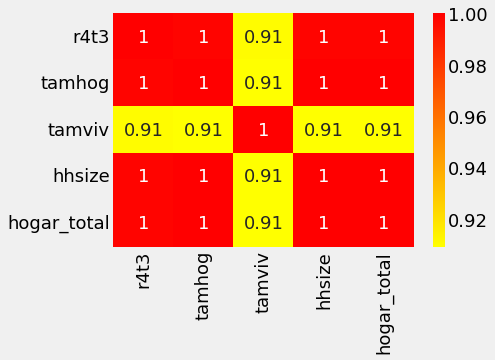

In [29]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9], annot=True, cmap=plt.cm.autumn_r)

In [30]:
heads = heads.drop(columns =['tamhog', 'hogar_total', 'r4t3'])

In [31]:
def plot_categoricals(x,y,data,annotate=True):
  """plot counts of two categoricals.
  Size is raw count for each grouping.
  Percentages are for a given value of y.
  """

  #Raw counts
  raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))
  raw_counts = raw_counts.rename(columns = {x : 'raw_count'})

  #Calculate counts for each group of x and y
  counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))

  #Rename the calumn and reset the index
  counts = counts.rename(columns = {x: 'normalized_count'}).reset_index()
  counts['percent'] = 100*counts['normalized_count']

  #Add the raw count
  counts['raw_count'] = list(raw_counts['raw_count'])

  plt.figure(figsize=(14,10))
  # Scatter plot sized by percent
  plt.scatter(counts[x], counts[y], edgecolor='k', color='lightgreen',
              s=100 * np.sqrt(counts['raw_count']),marker='o',
              alpha = 0.6, linewidth = 1.5)
  
  if annotate:
    # Annotate the plot with text
    for i, row in counts.iterrows():
      # put text with appropriate offsets
      plt.annotate(xy=(row[x]-(1/ counts[x].nunique()),
                       row[y]-(0.15 / counts[x].nunique())),
                   color = 'navy',
                   s = f"{round(row['percent'],1)}%")
      
  # Set tick marks
  plt.yticks(counts[y].unique())
  plt.xticks(counts[x].unique())

  #Transform min and max to evenly space in square root domain
  sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
  sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))

  # S sizes for legend
  msizes = list(range(sqr_min, sqr_max,
                      int((sqr_max-sqr_min)/5)))
  
  markers = []

  # Markers for legend

  for size in msizes:
    markers.append(plt.scatter([],[], s = 100*size, 
                               label = f'{int(round(np.square(size)/100)*100)}',
                               color = 'lightgreen',
                               alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
  #legend and formatting
  plt.legend(handles = markers, title = 'Counts',
             labelspacing = 3, handletextpad = 2,
             fontsize = 16,
             loc = (1.10, 0.19))
  plt.annotate(f'* Size represent raw count while % is for a given y value.',
               xy = (0,1), xycoords = 'figure points', size =10)
  
  # Adjust axes limits
  plt.xlim((counts[x].min()-(6 / counts[x].nunique()),
            counts[x].max() + (6 / counts[x].nunique())))
  plt.ylim((counts[y].min()-(6 / counts[y].nunique()),
            counts[y].max() + (6 / counts[y].nunique())))
  plt.grid(None)
  plt.xlabel(f'{x}')
  plt.ylabel(f'{y}')
  plt.title(f'{y} vs {x}')


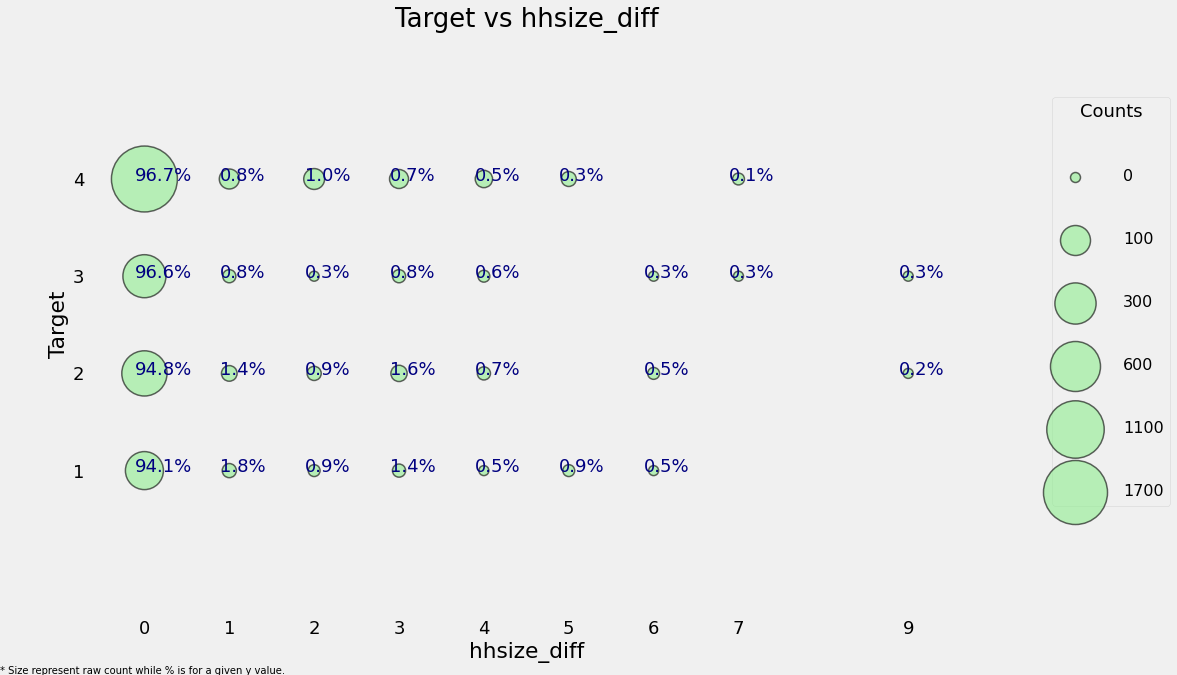

In [32]:
heads['hhsize_diff']=heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize_diff','Target', heads)

In [33]:
#heads = heads.drop(columns = 'area2)
heads.groupby('area1')['Target'].value_counts(normalize=True)

area1  Target
0      4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1      4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: Target, dtype: float64

In [34]:
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]), axis = 1)

In [35]:
heads['roof'] = np.argmax(np.array(heads[['etecho1','etecho2','etecho3']]), axis = 1)
heads['floor'] = np.argmax(np.array(heads[['eviv1','eviv2','eviv3']]), axis = 1)
heads = heads.drop(columns = ['epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3'])

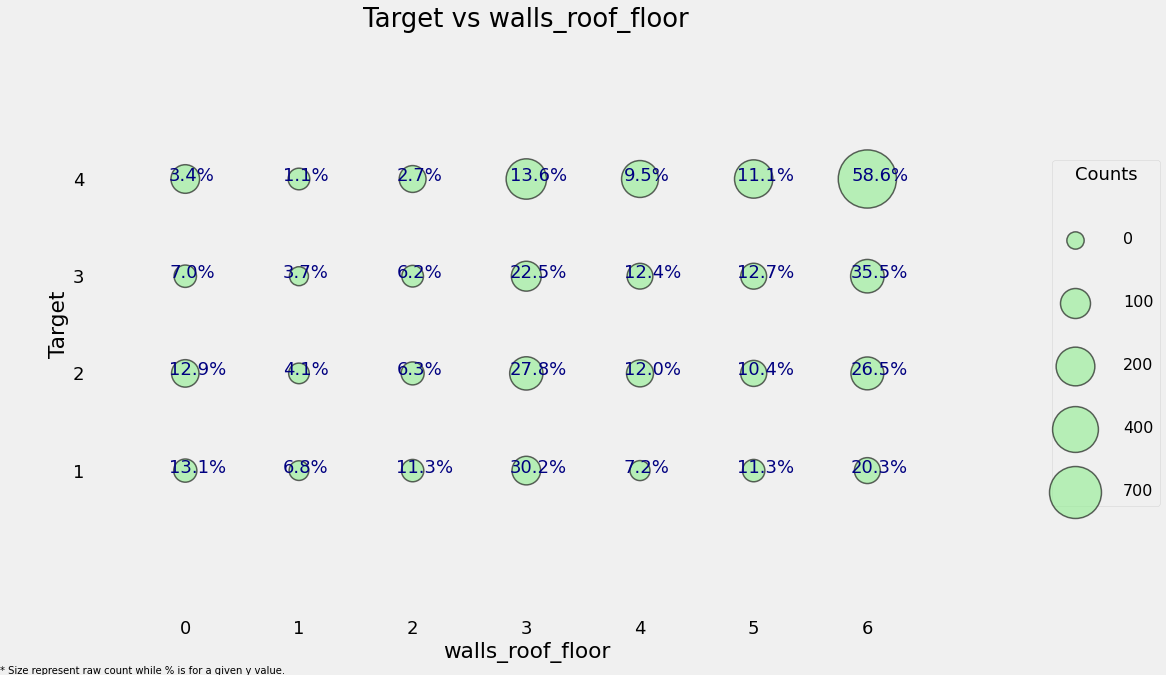

In [36]:
# 집의 전반적인 condition
heads['walls_roof_floor'] = heads['walls'] + heads['roof'] + heads['floor']
plot_categoricals('walls_roof_floor','Target', heads, annotate = True)

In [37]:
counts = pd.DataFrame(heads.groupby(['walls_roof_floor'])['Target'].value_counts(normalize=True)).rename(columns = {'Target': 'Normalized Count'}).reset_index()

counts.head()

,walls_roof_floor,Target,Normalized Count
0,0,4.0,0.376404
1,0,2.0,0.320225
2,0,1.0,0.162921
3,0,3.0,0.140449
4,1,4.0,0.323529


In [38]:
elec = []
for i, row in heads.iterrows():
  if row['noelec']:
    elec.append(0)
  elif row['coopele']:
    elec.append(1)
  elif row['public']:
    elec.append(2)
  elif row['planpri']:
    elec.append(3)
  else:
    elec.append(np.nan)

heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()
heads = heads.drop(columns = ['noelec','coopele','public', 'planpri'])

In [39]:
heads['warning'] = 1 * (heads['sanitario1'] +
                       (heads['elec'] == 0) +
                       heads['pisonotiene'] +
                       heads['abastaguano'] +
                       (heads['cielorazo'] == 0))

Text(0.5, 1.0, 'Target vs Warning')

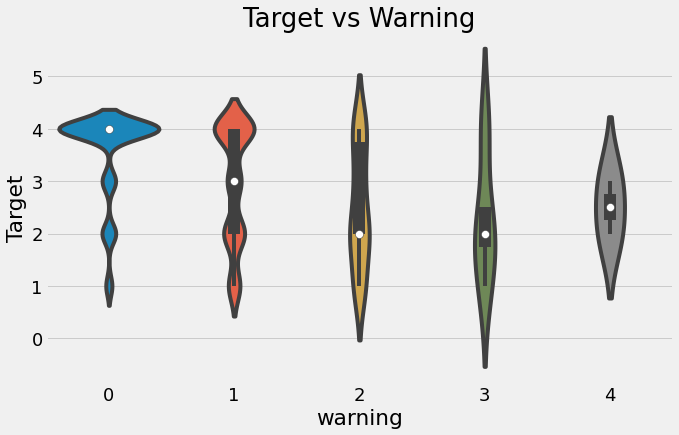

In [40]:
#heads['warning'].unique()

plt.figure(figsize = (10,6))
sns.violinplot(x='warning', y='Target', data=heads)
plt.title('Target vs Warning')

Text(0.5, 1.0, 'Target vs Bonus')

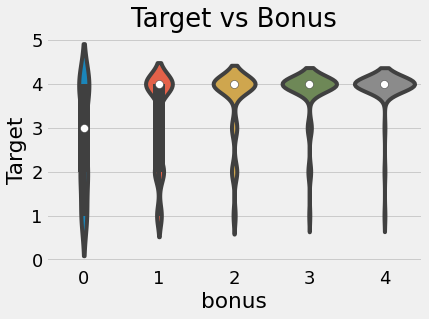

In [41]:
# 냉장고 & computer & tablet & television
heads['bonus'] = 1 * (heads['refrig'] +
                       heads['computer'] +
                       (heads['v18q1'] > 0)+
                       heads['television'])

sns.violinplot('bonus', 'Target', data=heads)
plt.title('Target vs Bonus')

In [42]:
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

In [43]:
heads.head()

,Id,idhogar,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,v2a1-missing,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,rooms,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,v18q1,tamviv,hhsize,hogar_nin,hogar_adul,hogar_mayor,bedrooms,qmobilephone,hhsize_diff,walls,roof,floor,walls_roof_floor,elec,elec-missing,warning,bonus,phones-per-capita,tablets-per-capita,rooms-per-capita,rent-per-capita
0,ID_279628684,21eb7fcc1,4.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,False,190000.0,0.0,10.0,0.0,10.0,1.000000,3,0,1,1,0,0,0,0,1,NaN,1,1,0,1,0,1,1,0,1,0,0,1,2.0,False,0,1,1.00,NaN,3.00,190000.0
1,ID_f29eb3ddd,0e5d7a658,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,False,135000.0,8.0,12.0,0.0,12.0,1.000000,4,0,1,1,0,0,0,0,1,1.0,1,1,0,1,1,1,1,0,1,1,1,3,2.0,False,0,2,1.00,1.00,4.00,135000.0
2,ID_68de51c94,2c7317ea8,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,True,NaN,8.0,0.0,11.0,11.0,0.500000,8,0,0,0,0,1,1,0,1,NaN,1,1,0,1,1,2,0,0,1,2,2,5,2.0,False,0,1,0.00,NaN,8.00,NaN
5,ID_ec05b1a7b,2b58d945f,4.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,False,180000.0,1.0,11.0,0.0,11.0,1.333333,5,0,2,2,1,1,2,1,3,1.0,4,4,2,2,0,3,3,0,2,2,2,6,2.0,False,0,2,0.75,0.25,1.25,45000.0
8,ID_1284f8aad,d6dae86b7,4.0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,False,130000.0,1.0,9.0,0.0,10.0,4.000000,2,0,1,1,2,1,3,2,2,NaN,4,4,2,2,0,1,1,0,0,0,1,1,2.0,False,0,1,0.25,NaN,0.50,32500.0


In [44]:
train_heads = heads.loc[heads['Target'].notnull(), :].copy()
pcorrs = pd.DataFrame(train_heads.corr()['Target'].sort_values()).rename(columns = {'Target' : 'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns = {'index':'feature'})

print(pcorrs.head())
print(pcorrs.dropna().tail())

        feature     pcorr
0       warning -0.301791
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4          r4m1 -0.209479
              feature     pcorr
88  phones-per-capita  0.299026
89              floor  0.307605
90   walls_roof_floor  0.332446
91           meaneduc  0.333652
92             Target  1.000000


In [45]:
from scipy.stats import spearmanr

feats =[]
scorr = []
pvalues = []
for column in heads.columns:
  if heads[column].dtypes != 'object':
    feats.append(column)

    #spearman corr 계산
    scorr.append(spearmanr(train_heads[column], train_heads['Target']).correlation)
    pvalues.append(spearmanr(train_heads[column], train_heads['Target']).pvalue)

scorrs = pd.DataFrame({'feature' : feats, 'scorr' : scorr, 'pvalue' : pvalues}).sort_values('scorr')

In [46]:
print(scorrs.head())
print(scorrs.dropna().tail())

        feature     scorr        pvalue
88      warning -0.307326  4.682829e-66
59   dependency -0.281516  2.792620e-55
76    hogar_nin -0.236225  5.567218e-39
71         r4t1 -0.219226  1.112230e-33
8   pisocemento -0.209387  8.270816e-31
              feature     scorr        pvalue
23          cielorazo  0.300996  2.611808e-63
84              floor  0.309638  4.466091e-67
90  phones-per-capita  0.337377  4.760104e-80
85   walls_roof_floor  0.338791  9.539346e-81
0              Target  1.000000  0.000000e+00


In [47]:
# scorrs, pcorrs 병합
corrs = pcorrs.merge(scorrs, on='feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']
corrs.sort_values('diff').head()

,feature,pcorr,scorr,pvalue,diff
72,rooms-per-capita,0.152185,0.223303,6.521453e-35,-0.071119
2,r4t1,-0.260917,-0.219226,1.112230e-33,-0.041691
88,phones-per-capita,0.299026,0.337377,4.760104e-80,-0.038351
4,r4m1,-0.209479,-0.171953,3.649343e-21,-0.037526
1,hogar_nin,-0.266309,-0.236225,5.567218e-39,-0.030084


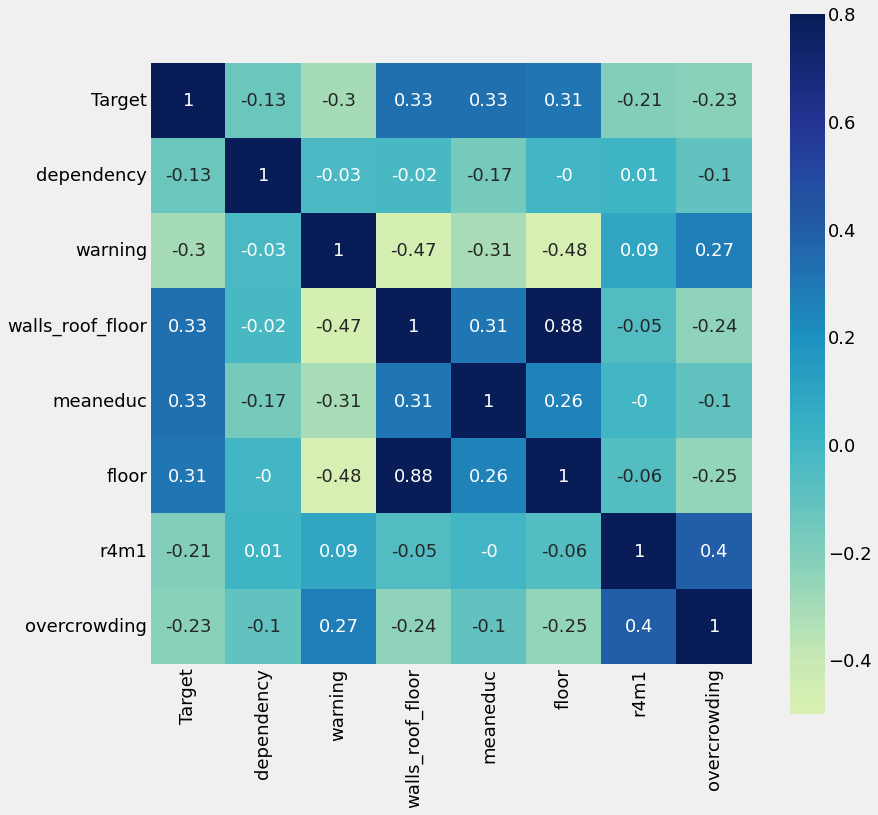

In [48]:
# heatmap
variables = ['Target', 'dependency', 'warning', 'walls_roof_floor', 'meaneduc', 'floor', 'r4m1', 'overcrowding']
corr_mat = train_heads[variables].corr().round(2)
plt.rcParams['font.size'] = 18
plt.figure(figsize=(12, 12))
sns.heatmap(corr_mat, vmin=-0.5, vmax=0.8, center=0, cmap=plt.cm.YlGnBu, square=True ,annot=True)

In [49]:
househod_feats = list(heads.columns)

In [50]:
data['rez_esc-missing']= data['rez_esc'].isnull()

In [51]:
ind = data[id_ + ind_bool + ind_ordered]
ind.shape

(33413, 40)

In [52]:
corr_matrix = ind.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
to_drop

['female']

In [53]:
ind.drop(columns = 'male', axis=1, inplace = True)

In [54]:
temp = ind[[c for c in ind.columns if c.startswith('inst')]]

In [55]:
temp.head()

,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0


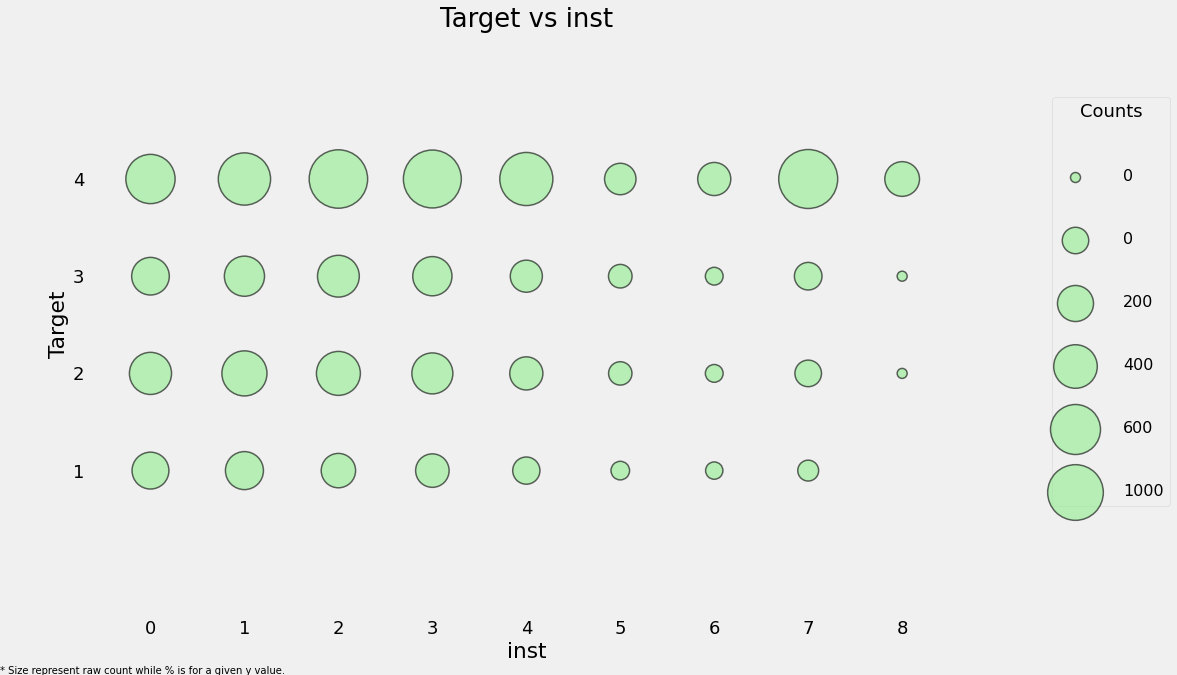

In [56]:
ind['inst'] = np.argmax(np.array(temp), axis = 1)
plot_categoricals('inst', 'Target', ind, annotate = False)

Text(0.5, 1.0, 'Education Distribution by Target')

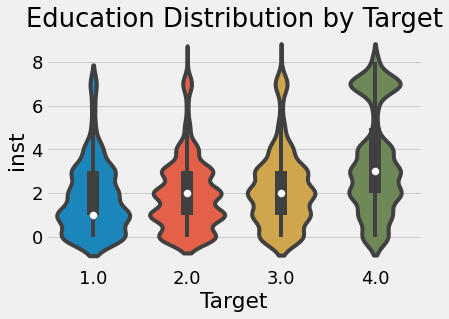

In [58]:
sns.violinplot('Target', 'inst', data =ind)
plt.title('Education Distribution by Target')

In [59]:
ind['inst/age']=ind['inst'] / ind['age']
ind['tech'] = ind['v18q'] + ind['mobilephone']
ind['tech'].describe()

count    33413.000000
mean         1.214886
std          0.462567
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: tech, dtype: float64

In [60]:
range_ = lambda x:x.max() - x.min()
range_.__name__='range_'
def range_2(x):
  return x.max() - x.min()

#dir(range_)

#Group and aggregate
ind_agg = ind.drop(columns = 'Target').groupby('idhogar').agg(['min','max','sum','count','std', range_2])

In [61]:
new_col = []
for c in ind_agg.columns.levels[0]:
  for stat in ind_agg.columns.levels[1]:
    new_col.append('{}-{}'.format(c, stat))

ind_agg.columns = new_col
ind_agg.head()

,v18q-min,v18q-max,v18q-sum,v18q-count,v18q-std,v18q-range_2,dis-min,dis-max,dis-sum,dis-count,dis-std,dis-range_2,female-min,female-max,female-sum,female-count,female-std,female-range_2,estadocivil1-min,estadocivil1-max,estadocivil1-sum,estadocivil1-count,estadocivil1-std,estadocivil1-range_2,estadocivil2-min,estadocivil2-max,estadocivil2-sum,estadocivil2-count,estadocivil2-std,estadocivil2-range_2,estadocivil3-min,estadocivil3-max,estadocivil3-sum,estadocivil3-count,estadocivil3-std,estadocivil3-range_2,estadocivil4-min,estadocivil4-max,estadocivil4-sum,estadocivil4-count,estadocivil4-std,estadocivil4-range_2,estadocivil5-min,estadocivil5-max,estadocivil5-sum,estadocivil5-count,estadocivil5-std,estadocivil5-range_2,estadocivil6-min,estadocivil6-max,estadocivil6-sum,estadocivil6-count,estadocivil6-std,estadocivil6-range_2,estadocivil7-min,estadocivil7-max,estadocivil7-sum,estadocivil7-count,estadocivil7-std,estadocivil7-range_2,parentesco1-min,parentesco1-max,parentesco1-sum,parentesco1-count,parentesco1-std,parentesco1-range_2,parentesco2-min,parentesco2-max,parentesco2-sum,parentesco2-count,parentesco2-std,parentesco2-range_2,parentesco3-min,parentesco3-max,parentesco3-sum,...,instlevel4-count,instlevel4-std,instlevel4-range_2,instlevel5-min,instlevel5-max,instlevel5-sum,instlevel5-count,instlevel5-std,instlevel5-range_2,instlevel6-min,instlevel6-max,instlevel6-sum,instlevel6-count,instlevel6-std,instlevel6-range_2,instlevel7-min,instlevel7-max,instlevel7-sum,instlevel7-count,instlevel7-std,instlevel7-range_2,instlevel8-min,instlevel8-max,instlevel8-sum,instlevel8-count,instlevel8-std,instlevel8-range_2,instlevel9-min,instlevel9-max,instlevel9-sum,instlevel9-count,instlevel9-std,instlevel9-range_2,mobilephone-min,mobilephone-max,mobilephone-sum,mobilephone-count,mobilephone-std,mobilephone-range_2,rez_esc-min,rez_esc-max,rez_esc-sum,rez_esc-count,rez_esc-std,rez_esc-range_2,escolari-min,escolari-max,escolari-sum,escolari-count,escolari-std,escolari-range_2,age-min,age-max,age-sum,age-count,age-std,age-range_2,inst-min,inst-max,inst-sum,inst-count,inst-std,inst-range_2,inst/age-min,inst/age-max,inst/age-sum,inst/age-count,inst/age-std,inst/age-range_2,tech-min,tech-max,tech-sum,tech-count,tech-std,tech-range_2
idhogar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000a08204,1,1,3,3,0.0,0,0,0,0,3,0.000000,0,0,1,1,3,0.577350,1,0,1,1,3,0.577350,1,0,1,2,3,0.57735,1,0,0,0,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.000000,0,0,0,0,3,0.0,0,0,0,0,3,0.00000,0,0,1,1,3,0.577350,1,0,1,1,3,0.577350,1,0,1,1,...,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.0,0,0,1,2,3,0.577350,1,0,0,0,3,0.0,0,1,1,3,3,0.0,0,NaN,NaN,0.0,0,NaN,NaN,0,14,26,3,7.571878,14,4,30,62,3,14.468356,26,0,7,14,3,4.041452,7,0.000000,0.250000,0.483333,3,0.139775,0.250000,2,2,6,3,0.0,0
000bce7c4,0,0,0,2,0.0,0,0,1,1,2,0.707107,1,0,1,1,2,0.707107,1,0,0,0,2,0.000000,0,0,0,0,2,0.00000,0,1,1,2,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.000000,0,0,0,0,2,0.0,0,0,0,0,2,0.00000,0,0,1,1,2,0.707107,1,0,1,1,2,0.707107,1,0,0,0,...,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.000000,0,0,0,0,2,0.0,0,1,1,2,2,0.0,0,NaN,NaN,0.0,0,NaN,NaN,0,5,5,2,3.535534,5,60,63,123,2,2.121320,3,0,1,1,2,0.707107,1,0.000000,0.016667,0.016667,2,0.011785,0.016667,1,1,2,2,0.0,0
001845fb0,0,0,0,4,0.0,0,0,0,0,4,0.000000,0,0,1,2,4,0.577350,1,0,0,0,4,0.000000,0,0,1,2,4,0.57735,1,0,0,0,4,0.0,0,0,0,0,4,0.0,0,0,0,0,4,0.000000,0,0,0,0,4,0.0,0,0,1,2,4,0.57735,1,0,1,1,4,0.500000,1,0,1,1,4,0.500000,1,0,1,2,...,4,0.5,1,0,1,1,4,0.5,1,0,0,0,4,0.0,0,0,0,0,4,0.0,0,0,1,1,4,0.500000,1,0,0,0,4,0.0,0,1,1,4,4,0.0,0,NaN,NaN,0.0,0,NaN,NaN,6,14,41,4,3.304038,8,19,52,142,4,16.421531,33,2,7,16,4,2.160247,5,0.038462,0.166667,0.511959,4,0.060123,0.128205,1,1,4,4,0.0,0
001ff74ca,1,1,2,2,0.0,0,0,0,0,2,0.000000,0,1,1,2,2,0.000000,0,0,1,1,2,0.707107,1,0,0,0,2,0.00000,0,0,0,0,2,0.0,0,0,0,0,2,0.0,0,0,1,1,2,0.707107,1,0,0,0,2,0.0,0,0,0,0,2,0.00000,0,0

In [63]:
corr_matrix = ind_agg.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

In [64]:
ind_agg['v18q-max']

idhogar
000a08204    1
000bce7c4    0
001845fb0    0
001ff74ca    1
003123ec2    0
            ..
ffcdf41de    0
ffe90d46f    0
fff6d7a90    0
fff7d6be1    0
fffbede04    0
Name: v18q-max, Length: 10340, dtype: int64

In [65]:
ind_agg = ind_agg.drop(columns=to_drop)

In [66]:
ind_feats = list(ind_agg.columns)
final = heads.merge(ind_agg, on = 'idhogar', how = 'left')
print(final.shape)

(10307, 217)


In [67]:
final.head()

,Id,idhogar,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,v2a1-missing,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,rooms,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,...,parentesco5-max,parentesco6-min,parentesco6-max,parentesco6-sum,parentesco7-min,parentesco7-max,parentesco8-min,parentesco8-max,parentesco9-min,parentesco9-max,parentesco9-sum,parentesco10-min,parentesco10-max,parentesco11-min,parentesco11-max,parentesco11-sum,parentesco12-min,parentesco12-max,parentesco12-sum,instlevel1-min,instlevel1-max,instlevel1-sum,instlevel2-min,instlevel2-max,instlevel2-sum,instlevel2-std,instlevel3-min,instlevel3-max,instlevel3-sum,instlevel3-std,instlevel4-min,instlevel4-max,instlevel4-sum,instlevel4-std,instlevel5-min,instlevel5-max,instlevel5-sum,instlevel6-min,instlevel6-max,instlevel7-min,instlevel7-max,instlevel8-min,instlevel8-max,instlevel8-sum,instlevel8-std,instlevel9-min,instlevel9-max,mobilephone-min,mobilephone-std,mobilephone-range_2,rez_esc-min,rez_esc-max,rez_esc-count,escolari-min,escolari-max,escolari-sum,escolari-std,escolari-range_2,age-min,age-max,age-sum,age-std,age-range_2,inst-max,inst-std,inst-range_2,inst/age-min,inst/age-max,inst/age-sum,inst/age-std,inst/age-range_2,tech-min,tech-sum,tech-std,tech-range_2
0,ID_279628684,21eb7fcc1,4.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,False,190000.0,0.0,10.0,0.0,10.0,1.000000,3,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,NaN,0,0,1,NaN,0,NaN,NaN,0,10,10,10,NaN,0,43,43,43,NaN,0,3,NaN,0,0.069767,0.069767,0.069767,NaN,0.000000,1,1,NaN,0
1,ID_f29eb3ddd,0e5d7a658,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,False,135000.0,8.0,12.0,0.0,12.0,1.000000,4,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,1,1,1,NaN,0,0,1,NaN,0,NaN,NaN,0,12,12,12,NaN,0,67,67,67,NaN,0,7,NaN,0,0.104478,0.104478,0.104478,NaN,0.000000,2,2,NaN,0
2,ID_68de51c94,2c7317ea8,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,True,NaN,8.0,0.0,11.0,11.0,0.500000,8,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,1,1,1,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,NaN,NaN,0,11,11,11,NaN,0,92,92,92,NaN,0,4,NaN,0,0.043478,0.043478,0.043478,NaN,0.000000,0,0,NaN,0
3,ID_ec05b1a7b,2b58d945f,4.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,False,180000.0,1.0,11.0,0.0,11.0,1.333333,5,0,2,2,1,1,2,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.5,0,0,0,0.0,0,1,1,0.5,0,1,2,0,0,0,0,0,0,0,0.0,0,0,1,0.0,0,0.0,1.0,2,2,11,33,4.272002,9,8,38,100,14.899664,30,4,1.414214,3,0.105263,0.176471,0.514842,0.033010,0.071207,2,8,0.0,0
4,ID_1284f8aad,d6dae86b7,4.0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,False,130000.0,1.0,9.0,0.0,10.0,4.000000,2,0,1,1,2,1,3,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0.5,0,0,0,0.0,0,1,1,0.5,0,1,1,0,0,0,0,0,0,0,0.0,0,0,1,0.0,0,0.0,1.0,2,0,11,23,5.123475,11,7,30,76,11.690452,23,4,1.825742,4,0.000000,0.142857,0.333766,0.060063,0.142857,1,4,0.0,0


In [68]:
corrs = final.corr()['Target']

In [69]:
corrs.sort_values().head()

warning          -0.301791
instlevel2-sum   -0.297868
instlevel1-sum   -0.271204
hogar_nin        -0.266309
r4t1             -0.260917
Name: Target, dtype: float64

In [70]:
corrs.sort_values().dropna().tail()

walls_roof_floor    0.332446
meaneduc            0.333652
inst-max            0.368229
escolari-max        0.373091
Target              1.000000
Name: Target, dtype: float64

Text(0.5, 1.0, 'Max schooling vs Target')

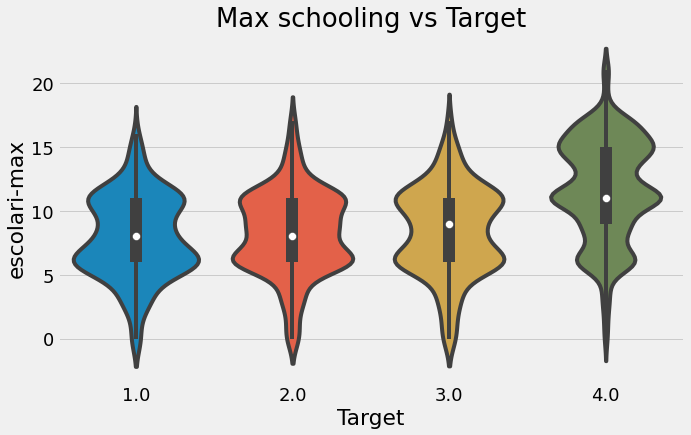

In [73]:
plt.figure(figsize=(10,6))
sns.violinplot('Target', 'escolari-max', data=final)
plt.title('Max schooling vs Target')

Text(0.5, 1.0, 'Average schooling vs Target')

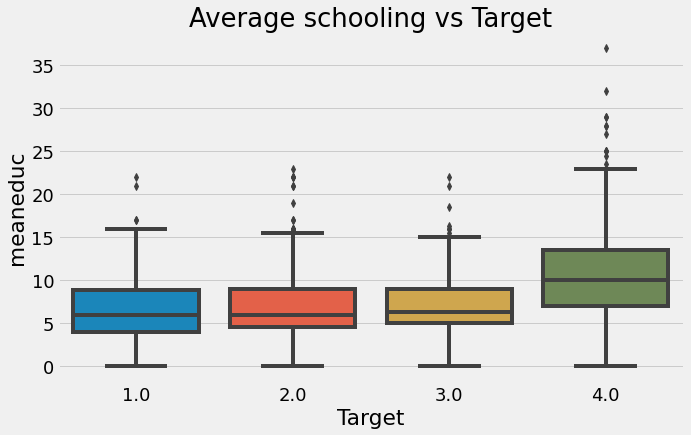

In [74]:
plt.figure(figsize=(10,6))
sns.boxplot('Target', 'meaneduc', data = final)
plt.title('Average schooling vs Target')

In [75]:
#household gender
head_gender = ind.loc[ind['parentesco1']==1,['idhogar','female']]
final = final.merge(head_gender, on='idhogar', how = 'left').rename(columns = {'female':'female-head'})

In [76]:
final.groupby('female-head')['Target'].value_counts(normalize = True)

female-head  Target
0            4.0       0.682873
             2.0       0.136464
             3.0       0.123204
             1.0       0.057459
1            4.0       0.617369
             2.0       0.167670
             3.0       0.113500
             1.0       0.101462
Name: Target, dtype: float64

Text(0.5, 1.0, 'Target vs female head')

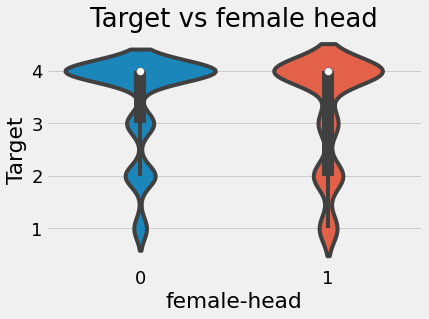

In [77]:
sns.violinplot('female-head', 'Target', data = final)
plt.title('Target vs female head')

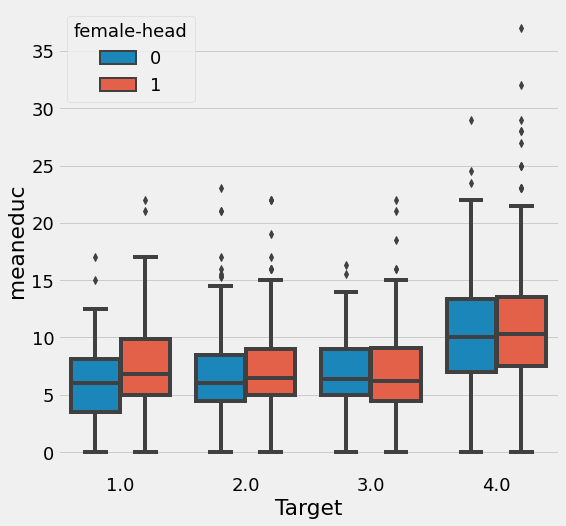

In [78]:
plt.figure(figsize=(8,8))
sns.boxplot('Target','meaneduc', hue = 'female-head', data = final)

In [79]:
final.groupby('female-head')['meaneduc'].agg(['mean','count'])

,mean,count
female-head,,
0,8.968025,6384
1,9.237013,3903
